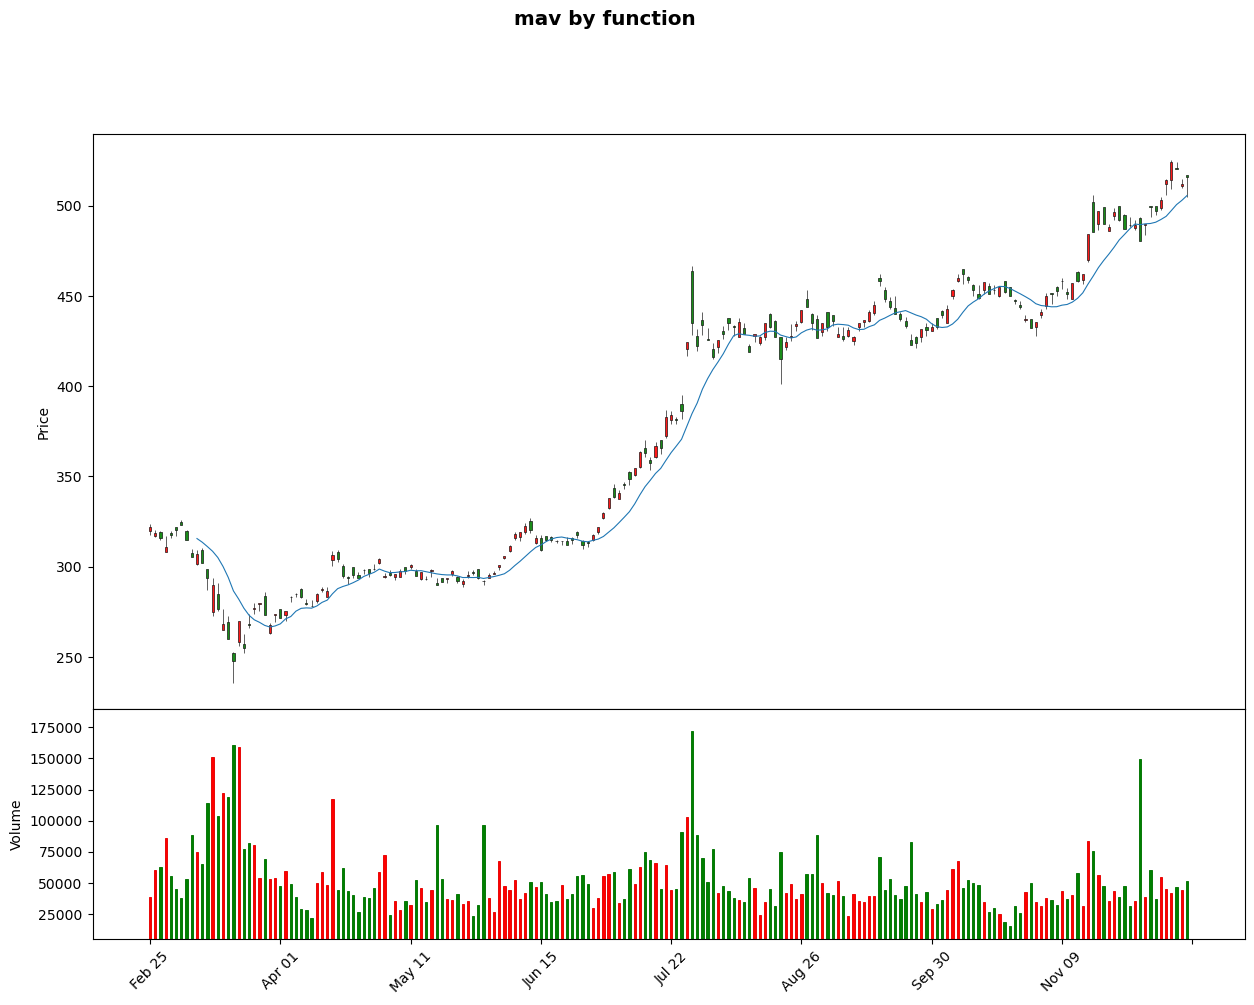

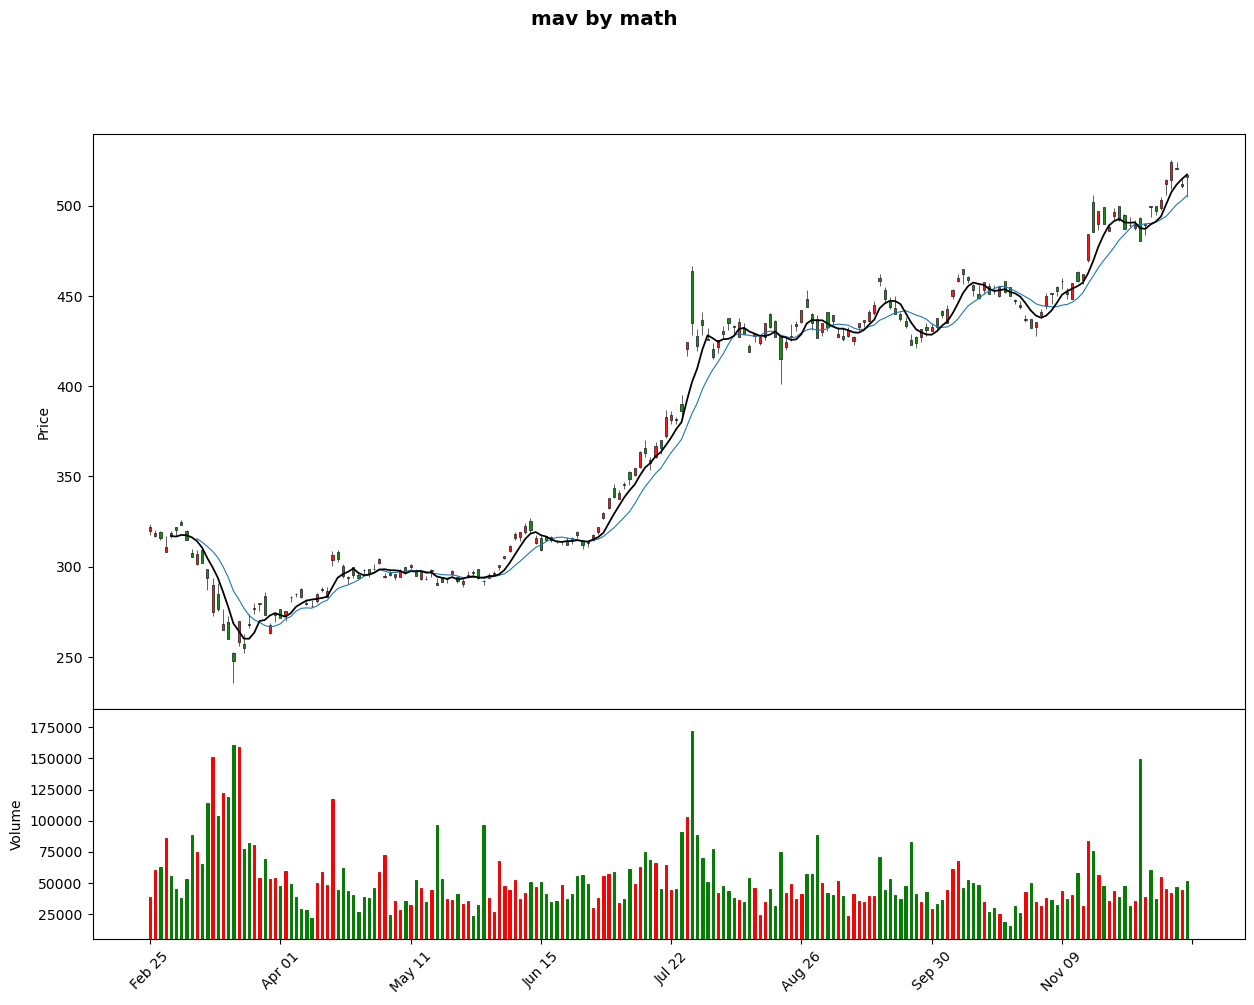

In [4]:
#使用數學方式計算 5日線
import numpy as np
import pandas as pd
import mplfinance as mpf

#讀資料 (亞信3169) 20150105-20191231
stocks = pd.read_csv('stocksTsmc_2020.csv')

#整理以及排列資料 
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))


#取最新100筆資料
stocks = stocks.tail(200)

#自定義
#紅漲綠跌 (更改顏色)
colorSet = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit')

#style也要一起做更改
styleSet = mpf.make_mpf_style(marketcolors = colorSet)

#kwargs
kwargs = dict(type = 'candle', mav = 10, volume = True, figscale = 2,\
              style = styleSet, scale_width_adjustment = dict(volume = 0.5))

#繪圖 (上方的圖)
mpf.plot(stocks, **kwargs, title = 'mav by function')

#############################################################################

#stocks_close是近 100天收盤價的 list
stocks_close = [line for line in stocks['Close']]

#宣告陣列放置 5日線之值，前四個為 np.nan
five_mav = [np.nan] * 4

#計算五日平均線
for i in range(4, len(stocks_close)):
    five_mav.append( sum( stocks_close[ i-4 : i+1 ]) / 5 )

#使用 addplot
five = mpf.make_addplot(five_mav, color = 'black')

#將自製 5日線匯出 (下方的圖)
mpf.plot(stocks, **kwargs, addplot = five, title = 'mav by math')